# Tutorial on Jupyter Notebook

## For the summary keyboard shortcuts, use `Help` &rarr; `Keyboard shortcuts`

## Modes
### Command Mode (press `Esc` to switch to command mode)
- Add a new cell: press `a` or `b` &rarr; insert cell above or below
- Delete selected cells: press `d` `d`

### Edit Mode (press `Enter` to switch to edit mode)


## Press `Shift-Enter` to run the cell or reflect the change

## Cell types

### Code cell type ("Y" key changes cell to Code type)
- Regular executable code

### Markdown cell type ("M" key changes cell to Markdown type)
- Similar to HTML
- Surround latex equation with `$`
- Example: $\frac{1}{2}$, $|\Psi\rangle$

### Raw cell type

# Tutorials on Qiskit

In [1]:
# comment
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

This tutorial is adapted from https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

In [3]:
import qiskit as qk

In [4]:
import numpy as np

In [5]:
%matplotlib inline

## Circuit Basics <a name='basics'></a>

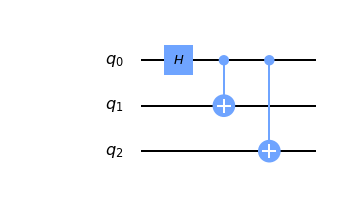

### Building the circuit

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of three qubits.

In [6]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = qk.QuantumCircuit(3)

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
* A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
* A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
* A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [7]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)

## Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

In [8]:
circ.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
q_2: ─────

In [9]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

In [10]:
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

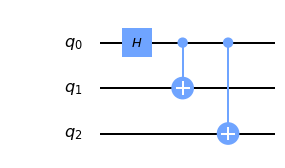

In [11]:
circ.draw('mpl')

In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

<div class="alert alert-block alert-info">


When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. Qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the <em><strong>left</strong></em> side of the tensor product, so that the basis vectors are labeled as  $Q_n\otimes \cdots  \otimes  Q_1\otimes Q_0$.

For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as $|100\rangle$, whereas many physics textbooks would represent it as $|001\rangle$.

This difference in labeling affects the way multi-qubit operations are represented as matrices. For example, Qiskit represents a controlled-X ($C_{X}$) operation with qubit 0 being the control and qubit 1 being the target as

$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}.$$

</div>

## Simulating circuits using Qiskit Aer <a name='simulation'></a>

Qiskit Aer is our package for simulating quantum circuits. It provides many different backends for doing a simulation. There is also a basic, Python only, implementation called `BasicAer` in Terra that can be used as a drop-in replacement for `Aer` in the examples below.

### Statevector backend

The most common backend in Qiskit Aer is the `statevector_simulator`. This simulator returns the quantum 
state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits 
(so be careful using this as it will quickly get too large to run on your machine).

To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to `statevector_simulator`.

In [12]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
statevec_sim_backend = Aer.get_backend('statevector_simulator')

Now that we have chosen the backend, it's time to compile and run the quantum circuit. In Qiskit we provide the `execute` function for this. ``execute`` returns a ``job`` object that encapsulates information about the job submitted to the backend.

In [13]:
# Create a Quantum Program for execution 
job = qk.execute(circ, statevec_sim_backend)

When you run a program, a job object is made that has the following two useful methods: 
`job.status()` and `job.result()`, which return the status of the job and a result object, respectively.

<div class="alert alert-block alert-info">
<b>Note:</b> Jobs run asynchronously, but when the result method is called, it switches to synchronous and waits for it to finish before moving on to another task.
</div>

In [14]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [15]:
result = job.result()

The results object contains the data and Qiskit provides the method 
`result.get_statevector()` to return the state vector for the quantum circuit.

In [16]:
outputstate = result.get_statevector(decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


Qiskit also provides a visualization toolbox to allow you to view these results.

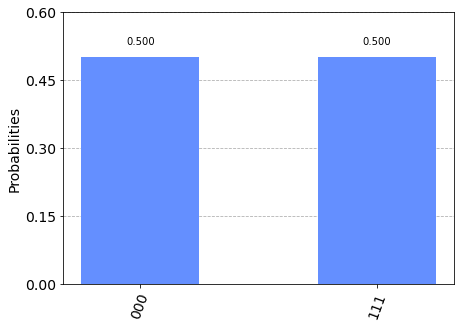

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

### Unitary backend

Qiskit Aer also includes a `unitary_simulator` that works _provided all the elements in the circuit are unitary operations_. This backend calculates the $2^n \times 2^n$ matrix representing the gates in the quantum circuit. 

In [18]:
# Run the quantum circuit on a unitary simulator backend
unitar_sim_backend = Aer.get_backend('unitary_simulator')
job = qk.execute(circ, unitar_sim_backend)
result = job.result()

# Show the results
print(result.get_unitary(decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


### OpenQASM backend

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by _measuring_ each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits. 

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state

$$|\psi\rangle = |000\rangle +|111\rangle)/\sqrt{2},$$

and let $xyz$ denote the bitstring that results. Recall that, under the qubit labeling used by Qiskit, $x$ would correspond to the outcome on qubit 2, $y$ to the outcome on qubit 1, and $z$ to the outcome on qubit 0. 

<div class="alert alert-block alert-info">
<b>Note:</b> This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way, which is why Qiskit uses a non-standard tensor product order.
</div>

Recall the probability of obtaining outcome $xyz$ is given by

$$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$$

and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.

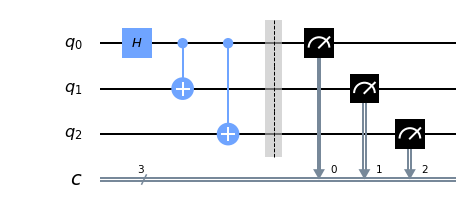

In [19]:
# Create a Quantum Circuit
meas = qk.QuantumCircuit(3, 3)
meas.barrier([0,1,2]) # or meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure([0,1,2],[0,1,2]) # or meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw('mpl')

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits. 

To simulate this circuit, we use the ``qasm_simulator`` in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the ``execute`` function, via the ``shots`` keyword.

In [20]:
# Use Aer's qasm_simulator
qasm_sim_backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job = qk.execute(qc, qasm_sim_backend, shots=1024)

# Grab the results from the job.
result_sim = job.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [21]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 514, '111': 510}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

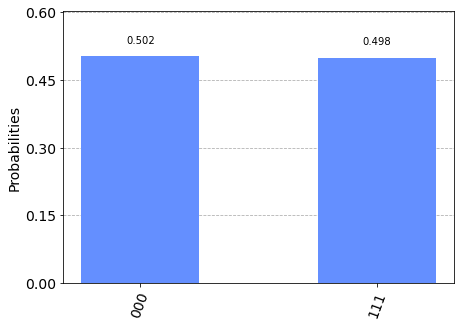

In [22]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``execute`` function and see how the estimated probabilities change.

## Bloch sphere representation

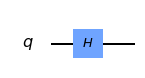

In [23]:
single_qubit = qk.QuantumCircuit(1)
single_qubit.h(0)
single_qubit.draw('mpl')

In [24]:
job = qk.execute(single_qubit, statevec_sim_backend).result()

[0.70710678+0.j 0.70710678+0.j]


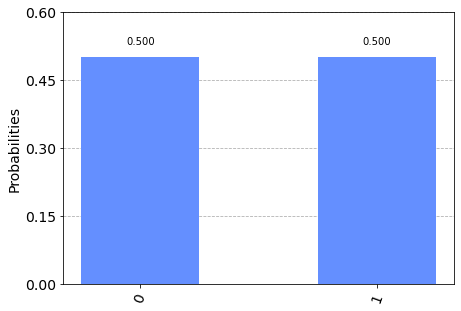

In [25]:
print(job.get_statevector())
plot_histogram(job.get_counts())

$\frac{|0\rangle+|1\rangle}{\sqrt{2}}$

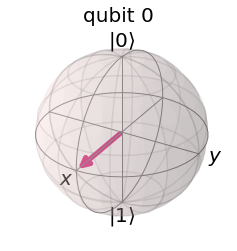

In [26]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(job.get_statevector())

# Quantum hardware backend (IBMQ server)

How to get your credential to access the IBMQ server:

https://qiskit.org/documentation/install.html#access-ibm-quantum-systems

In [1]:
from qiskit import IBMQ

How to access the IBMQ server:

https://github.com/Qiskit/qiskit-ibmq-provider/#accessing-your-ibm-quantum-experience-backends

In [2]:
provider = IBMQ.load_account()

In [33]:
print("Available backends:")
provider.backends()

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [34]:
from qiskit.providers.ibmq import least_busy

In [35]:
large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmqx2


In [36]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

## qasm simulator on the IBMQ server

In [37]:
ibmq_qasm_simulator_backend = provider.get_backend('ibmq_qasm_simulator')

In [38]:
backend_status = ibmq_qasm_simulator_backend.status()
[backend_status.backend_name, backend_status.operational, backend_status.pending_jobs, backend_status.status_msg]

['ibmq_qasm_simulator', True, 1, 'active']

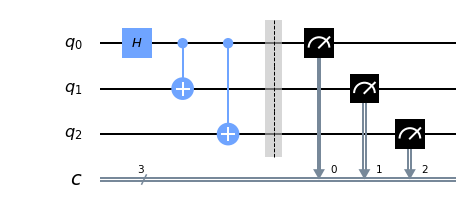

In [39]:
# Create a Quantum Circuit
meas = qk.QuantumCircuit(3, 3)
meas.barrier([0,1,2]) # or meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure([0,1,2],[0,1,2]) # or meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw('mpl')

In [40]:
job = qk.execute(qc, ibmq_qasm_simulator_backend, shots=4096)

In [42]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [43]:
# Grab the results from the job.
result_sim = job.result()

In [44]:
counts = result_sim.get_counts()
print(counts)

{'000': 2044, '111': 2052}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

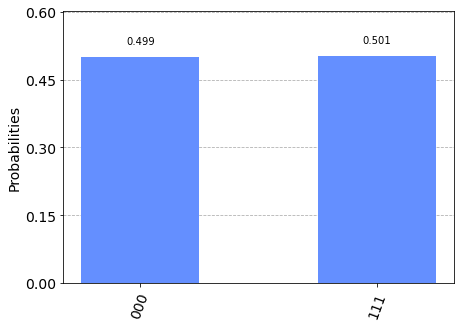

In [45]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## qasm simulator on the IBMQ server

In [46]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [56]:
ibmq_quantum_device_backend = provider.get_backend('ibmqx2')

In [66]:
backend_status = ibmq_quantum_device_backend.status()
[backend_status.backend_name, backend_status.operational, backend_status.pending_jobs, backend_status.status_msg]

['ibmqx2', True, 2, 'active']

In [58]:
job = qk.execute(qc, ibmq_quantum_device_backend, shots=4096)

In [70]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [71]:
# Grab the results from the job.
result_sim = job.result()

In [72]:
counts = result_sim.get_counts()
print(counts)

{'011': 51, '010': 54, '110': 25, '001': 14, '101': 94, '000': 1886, '111': 1955, '100': 17}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

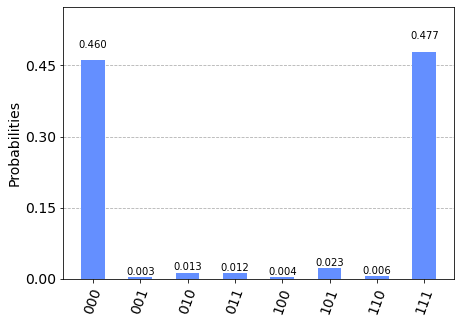

In [73]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)